In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Template Matching

In [2]:
img= cv2.imread('image.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template= cv2.imread('template.jpg',0)
w,h = template.shape[::-1]

res= cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold= 0.75

loc= np.where(res>= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0,255,0),2)

cv2.imshow("Templated Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Grey Scale Feature Matching 

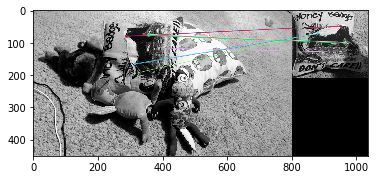

In [3]:
img= cv2.imread('feature2.jpg',0)
template= cv2.imread('feature1.jpg',0)

orb= cv2.ORB_create()
kp1, des1= orb.detectAndCompute(img, None)
kp2, des2= orb.detectAndCompute(template, None)

bf= cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches= bf.match(des1, des2)
matches= sorted(matches, key= lambda x: x.distance)

img1= cv2.drawMatches(img, kp1, template, kp2, matches[:10], None, flags=2)
plt.imshow(img1)
plt.show()

### Colored Feature Matching

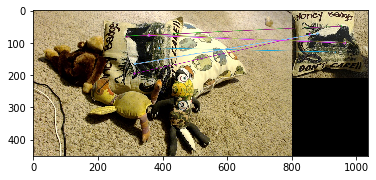

In [4]:
img= cv2.imread('feature2.jpg',1)
template= cv2.imread('feature1.jpg',1)

orb= cv2.ORB_create()
kp1, des1= orb.detectAndCompute(img, None)
kp2, des2= orb.detectAndCompute(template, None)

bf= cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches= bf.match(des1, des2)
matches= sorted(matches, key= lambda x: x.distance)

img1= cv2.drawMatches(img, kp1, template, kp2, matches[:10], None, flags=2)
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()